<a href="https://colab.research.google.com/github/December04/MachineLearningProgramming/blob/main/Week09/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [16]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TSLA.csv")
df = df.drop(columns=['Close', 'Adj Close', 'Volume', 'Date'], errors='ignore')

In [17]:
df = df.dropna()

In [18]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

In [19]:
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [21]:
def create_dataset(dataset, window):
    X, y = [], []
    for i in range(len(dataset) - window):
        X.append(dataset[i:i+window])
        y.append(dataset[i+window, 0])
    return np.array(X), np.array(y)


In [22]:
window = 20
X_train, y_train = create_dataset(train_data, window)
X_test, y_test = create_dataset(test_data, window)

In [23]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [25]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (2344, 20, 3) (2344,)
Test shape: (572, 20, 3) (572,)


In [26]:
# RNN 모델
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(window, X_train.shape[2])),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')

rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=50, batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3.9965e-04 - val_loss: 0.0192
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6688e-06 - val_loss: 0.0086
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4313e-06 - val_loss: 0.0085
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.1063e-06 - val_loss: 0.0067
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1947e-06 - val_loss: 0.0057
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4794e-06 - val_loss: 0.0058
Epoch 7/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7761e-06 - val_loss: 0.0045
Epoch 8/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9141e-06 - val_loss: 0.0055
Epoch 9/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.4912e-06 - val_loss: 0.0044
Epoch 10/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.4571e-06 - val_loss: 0.0048
Epoch 11/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3700e-06 - val_loss: 0.0043
Epoch 12/50
293/293

In [27]:
# LSTM 모델
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, X_train.shape[2])),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=50, batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6.8833e-05 - val_loss: 0.0013
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.3014e-06 - val_loss: 0.0011
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.1112e-06 - val_loss: 9.1538e-04
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.6377e-06 - val_loss: 7.5845e-04
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.1543e-06 - val_loss: 7.6794e-04
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.9756e-06 - val_loss: 7.5981e-04
Epoch 7/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.8691e-06 - val_loss: 0.0015
Epoch 8/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6143e-06 - val_loss: 8.4603e-04
Epoch 9/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.6453e-06 - val_loss: 6.5512e-04
Epoch 10/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6331e-06 - val_loss: 8.6956e-04
Epoch 11/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.4013e-06

In [28]:
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [29]:
scaler_y = MinMaxScaler()
scaler_y.min_, scaler_y.scale_ = scaler.min_[0], scaler.scale_[0]

In [30]:
y_test_inversed = scaler_y.inverse_transform(y_test.reshape(-1, 1))
rnn_pred_inversed = scaler_y.inverse_transform(rnn_pred)
lstm_pred_inversed = scaler_y.inverse_transform(lstm_pred)

In [31]:
rnn_mse = mean_squared_error(y_test_inversed, rnn_pred_inversed)
lstm_mse = mean_squared_error(y_test_inversed, lstm_pred_inversed)

In [32]:
print(f"RNN Test MSE: {rnn_mse:.4f}")
print(f"LSTM Test MSE: {lstm_mse:.4f}")
print(f"RNN Test RMSE: {np.sqrt(rnn_mse):.4f}")
print(f"LSTM Test RMSE: {np.sqrt(lstm_mse):.4f}")

RNN Test MSE: 1298.2244
LSTM Test MSE: 2080.3724
RNN Test RMSE: 36.0309
LSTM Test RMSE: 45.6111


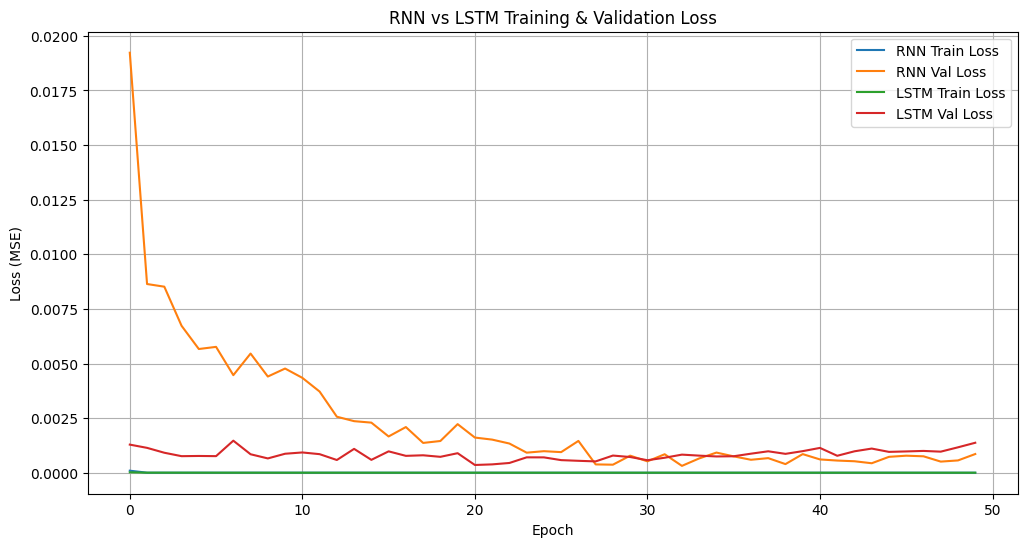

In [33]:
plt.figure(figsize=(12,6))
plt.plot(rnn_history.history['loss'], label='RNN Train Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Val Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.title('RNN vs LSTM Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

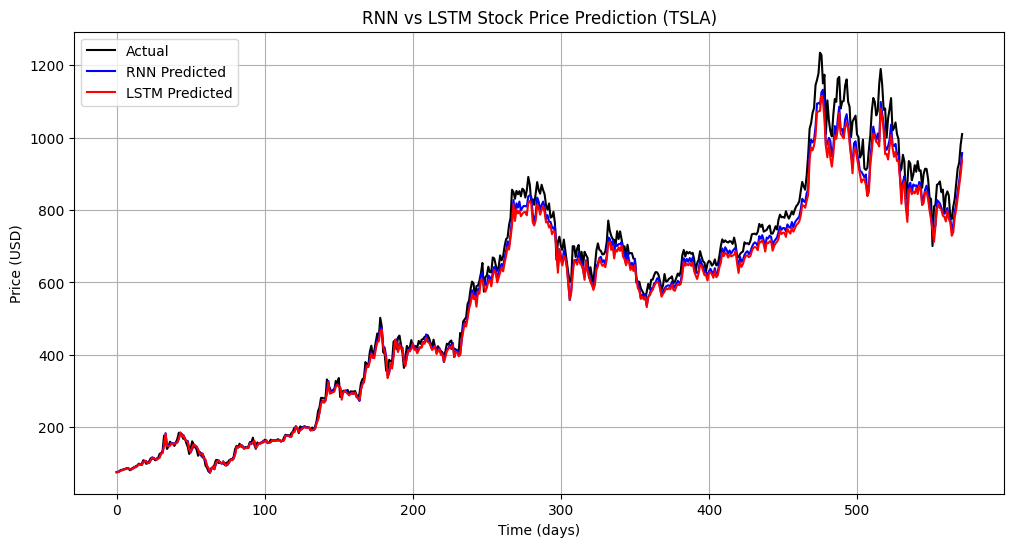

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inversed, label='Actual', color='black')
plt.plot(rnn_pred_inversed, label='RNN Predicted', color='blue')
plt.plot(lstm_pred_inversed, label='LSTM Predicted', color='red')
plt.title('RNN vs LSTM Stock Price Prediction (TSLA)')
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()